Throughput of Sparse Matrix-Matrix Multiply
----------------------------------------

In [1]:
using PyPlot
using Statistics
using SparseArrays

In [2]:
n = 1000;
x = randn(n,n);
y = randn(n,n);

In [3]:
t_dense = mean([(@elapsed x * y) for i = 1:10]);

In [4]:
dds = [0.0003,0.001,0.003,0.01,0.03,0.1,0.3];
t_sparse_ux = zeros(length(dds));
t_sparse_xu = zeros(length(dds));
for i = 1:length(dds)
    dd = dds[i];
    u = sprandn(n,n,dd);
    t_sparse_ux[i] = mean([(@elapsed u * x) for i = 1:10]);
    t_sparse_xu[i] = mean([(@elapsed x * u) for i = 1:10]);
end

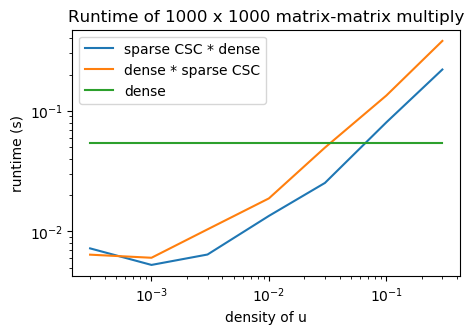

In [5]:
figure(figsize=(5.0,3.2));
loglog(dds, t_sparse_ux; label="sparse CSC * dense");
loglog(dds, t_sparse_xu; label="dense * sparse CSC");
loglog(dds, [t_dense for dd in dds]; label="dense");
title("Runtime of 1000 x 1000 matrix-matrix multiply");
xlabel("density of u");
ylabel("runtime (s)");
legend();